### Week 2 practice notebook

Reading/manipulating data, functions, curve fitting, conditionals, and loops.

Start by importing numpy, matplotlib.pyplot, and scipy.optimze.curve_fit

In [1]:
# Add import statements
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#### **Part 1**

The file `Chlorine_data.txt` lists the chlorine concentration (ppm) measured in a swimming pool on different days in February.

Read in the data from this file and store the days and the chlorine concentrations as 1d arrays.

In [50]:
data = np.genfromtxt("Chlorine_data.txt", delimiter=',').T
days = data[0]
concentrations=data[1]

Due to a systematic error, all measurements obtained before the 12th of the month are too low by 0.5 ppm.

Using conditional statements within a loop, create a new list where the bad values have been corrected.

In [34]:
fixed_concentrations = []
for n in range(len(days)):
    if days[n] < 12:
        fixed_concentrations.append(concentrations[n]-0.5)
    else:
        fixed_concentrations.append(concentrations[n])

Make a scatter plot of day versus chlorine concentration, showing both the original data and fixed data.

Label your axes and include a legend.

Text(0, 0.5, 'Chlorine concentration (ppm)')

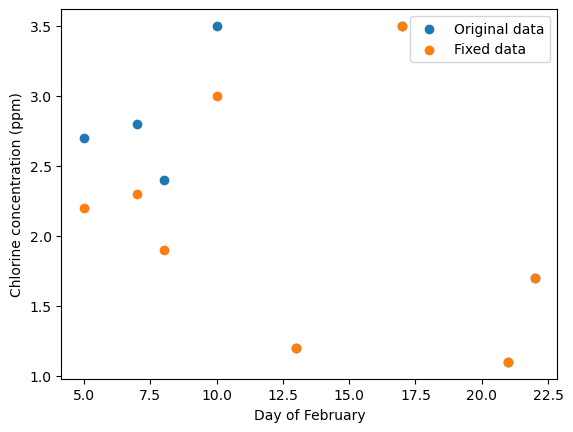

In [35]:
plt.scatter(days,concentrations, label='Original data')
plt.scatter(days,fixed_concentrations, label='Fixed data')
plt.legend()
plt.xlabel("Day of February")
plt.ylabel("Chlorine concentration (ppm)")

Use a `for` loop to print for each measurement in the fixed data set: "The concentration of chlorine is ___ ppm."

In [52]:
for x in fixed_concentrations:
    print("The concentration of chlorine is " + str(x) + " ppm.")

The concentration of chlorine is 3.5 ppm.
The concentration of chlorine is 2.3 ppm.
The concentration of chlorine is 1.2 ppm.
The concentration of chlorine is 1.1 ppm.
The concentration of chlorine is 1.7 ppm.
The concentration of chlorine is 2.2 ppm.
The concentration of chlorine is 3.0 ppm.
The concentration of chlorine is 1.9 ppm.


#### **Part 2**

Read in the data from the file `spectrum2.txt`.  Store the input data as two 1d arrays and make a line plot to visualize the data.

Text(0, 0.5, 'Absorbance')

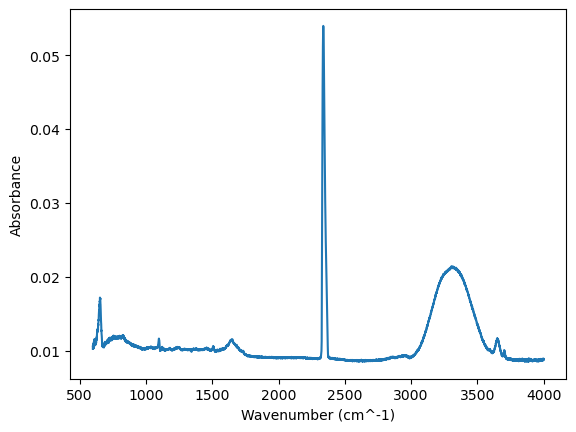

In [37]:
data = np.genfromtxt("spectrum2.txt", delimiter=',').T
wavenumber = data[0]
absorbance = data[1]

plt.plot(wavenumber,absorbance)
plt.xlabel("Wavenumber (cm^-1)")
plt.ylabel("Absorbance")

Create new arrays containing just the region of the spectrum surrounding the peak around 2350 wavenumbers.  Include ~100 wavenumbers on either side of the peak.  Hint: in Data lesson 4 we saw an example of selecting part of a spectrum within some upper & lower bound.

Plot the new zoomed-in spectrum.

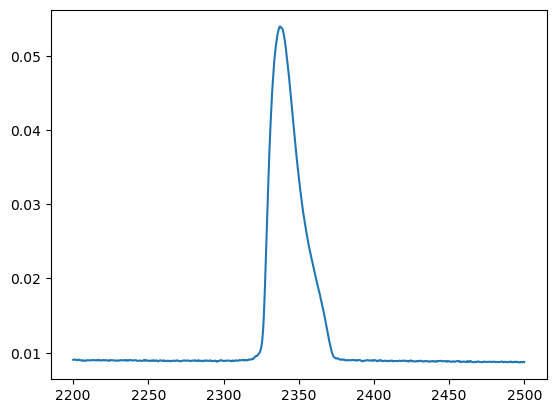

In [11]:
idcs = np.logical_and(wavenumber>2200,wavenumber<2500)
wn_zoom = wavenumber[idcs] 
abs_zoom = absorbance[idcs]

plt.plot(wn_zoom, abs_zoom)

Create a new function called `line()` to describe a line, y=mx+b.

In [12]:
def line(xx,mm,bb):
    return mm*xx+bb

From your zoomed-in spectrum, find the indices corresponding to a region containing only the baseline, i.e. a region with no absorbance signal.  Hint: you can use a Boolean statement to find the indices where the wavenumber values are less than a specified threshold.

In [ ]:
i_baseline = wn_zoom < 2300

array([False, False, False, ...,  True,  True,  True])

Now fit a line to this baseline-only part of the spectrum, using the indices defined above when passing the x and y data to `curve_fit()`.

In [14]:
params, pcov = curve_fit(line, wn_zoom[i_baseline], abs_zoom[i_baseline])
params

array([-1.0483042e-06,  1.1300516e-02])

The results of this fitting provide us with a model of the baseline around the peak of interest.

Make a new array containing the best-fit model of the baseline.  Hint: evaluate the function used to fit the data at each x value in the original data set, and with the best-fit parameters provided by `curve_fit()`.

In [16]:
baseline = line(wn_zoom, params[0], params[1])

Plot the baseline model on top of your zoomed-in spectrum.

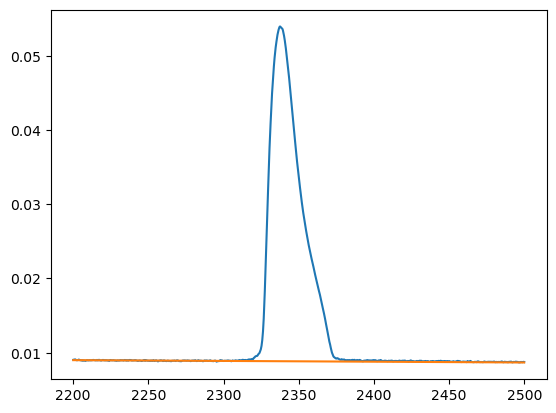

In [17]:
plt.plot(wn_zoom,abs_zoom)
plt.plot(wn_zoom, baseline)

Subtract the value of the baseline model from the absorbance value at each wavenumber in the zoomed-in spectrum.

Make a plot of the baseline-subtracted spectrum.

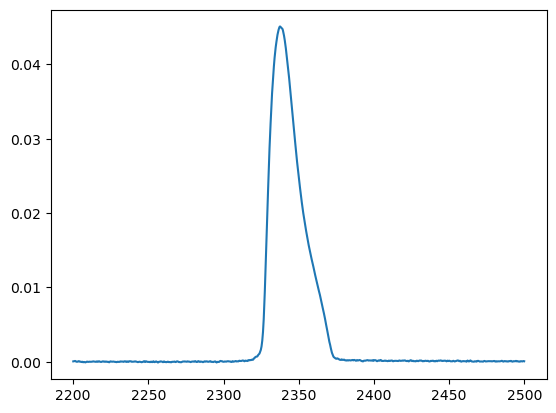

In [18]:
abs_zoom_bl = abs_zoom - baseline
plt.plot(wn_zoom, abs_zoom_bl)

Now create a new function called `gaussian()` to describe a Gaussian profile based on a center, amplitude, and width.  Hint: remember we created a function like this in Data lesson 6.

In [40]:
def gaussian(xx, amplitude, center, width):
    ygauss = amplitude*np.exp(-(xx-center)**2/(2*width**2))
    return ygauss

Fit a Gaussian profile to baseline-subtracted absorbance spectrum.

In [ ]:
params, pcov = curve_fit(gaussian, wn_zoom, abs_zoom_bl, p0 = [0.05,2350,10])

[4.37990774e-02 2.34091494e+03 6.78179749e+00]


Create a new array containing the best-fit Gaussian model of the data.

Plot the best-fit model on top of the actual data.


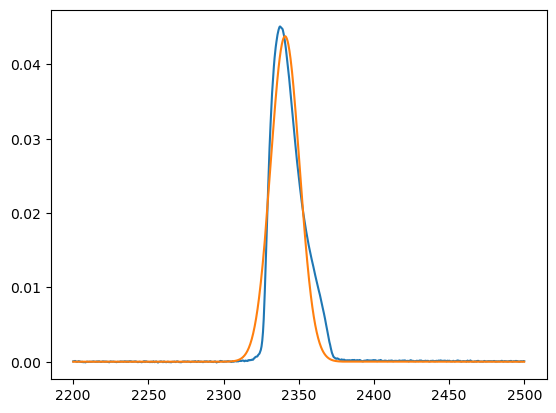

In [21]:
gauss_peak = gaussian(wn_zoom, params[0], params[1], params[2])

plt.plot(wn_zoom, abs_zoom_bl)
plt.plot(wn_zoom, gauss_peak)

How does the fit look? What could be done to improve the fitting?

Calculate the uncertainties on each fit parameter.

In [38]:
errors = np.sqrt(np.diag(pcov))
print(errors)

[0.00031558 0.07979705 0.05642504]
